## Problem Statement:
### Extract reviews of any product from ecommerce website like amazon
### Perform emotion mining

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import wordcloud
from wordcloud import WordCloud

from bs4 import BeautifulSoup as bs
import requests
import re

### Reading the amazon customer review link for an Oneplus 9R

In [2]:
amazon='https://www.amazon.in/'
reviews='https://www.amazon.in/Test-Exclusive_2020_1178-Multi-3GB-Storage/product-reviews/B089MTJVLD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

### Creating 4 empty lists, which will hold the values of each customer name, the review title, the rating and the review content they have given

In [3]:
customer_name = []
review_title = []
rate = []
review_content = []

### Requesting amazon website to get the reviews and running a loop to achieve the following:

### Extracting the customer name from the 'a-profile name' class, under the 'span' tag, of the html code
### Extracting the review title from the 'data-hook', under the 'a' tag, of the html code
### Extracting the rating from the 'review rating' class, under the 'i' tag, of the html code
### Extracting the review body from the 'data-hook', under the 'span' tag, of the html code
### Finally running a loop to find any reviews with any links. These links will be added back to the main amazon link and be considered as the new link for which, again the customer name, review title, the rating and review content should be extracted and put in the form of a list

In [4]:
tt = 0
while tt == 0:
    page = requests.get(reviews)
    while page.ok == False:  
        page = requests.get(reviews)
    
    
    soup = bs(page.content,'html.parser')
    soup.prettify()
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        customer_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        reviews = amazon + A
    except:
        break

### Checking the length of the customer_name who gave the reviews

In [5]:
len(customer_name)

2644

### Checking the length of the review title for all the reviews

In [6]:
len(review_title)

2644

### Checking the length of the rating for all the reviews

In [7]:
len(rate)

2644

### Checking the length of the review content for all the reviews

In [8]:
len(review_content)

2644

### Removing the spaces in the entire texts thats extracted from the customer review page

In [9]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smhac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Creating a dataframe containing all the four lists, which are extracted from the customer review page

In [11]:
amaplus = pd.DataFrame()

In [12]:
amaplus['Customer Name'] = customer_name
amaplus['Review Title'] = review_title
amaplus['Rating'] = rate
amaplus['Reviews'] = review_content

In [13]:
amaplus.head()

,Customer Name,Review Title,Rating,Reviews
0,Vijay Gandhi,OnePlus 9R - Not As per Expectations,1.0 out of 5 stars,Battery Issue.... Phone is Heating during Ch...
1,NeHaaL,Heating issue,1.0 out of 5 stars,Facing heating issue while using camera app ...
2,Mohit MJ,Amazing - True Flagship,5.0 out of 5 stars,My first time buying a OnePlus phone and I r...
3,AshokA,Over heat mobile,1.0 out of 5 stars,Within 10 minutes of usage. It’s felt like o...
4,nikhitha,Disappointed with 9 R Mobile,2.0 out of 5 stars,"Iam OnePlus user since 4 years, I exchange m..."


### Exporting the dataframe to a csv file

In [14]:
amaplus.to_csv('amaplus.csv',index = True)

### Reading the csv file that we had just exported

In [15]:
data = pd.read_csv("amaplus.csv",index_col=[0])

In [16]:
data.head()

,Customer Name,Review Title,Rating,Reviews
0,Vijay Gandhi,OnePlus 9R - Not As per Expectations,1.0 out of 5 stars,Battery Issue.... Phone is Heating during Ch...
1,NeHaaL,Heating issue,1.0 out of 5 stars,Facing heating issue while using camera app ...
2,Mohit MJ,Amazing - True Flagship,5.0 out of 5 stars,My first time buying a OnePlus phone and I r...
3,AshokA,Over heat mobile,1.0 out of 5 stars,Within 10 minutes of usage. It’s felt like o...
4,nikhitha,Disappointed with 9 R Mobile,2.0 out of 5 stars,"Iam OnePlus user since 4 years, I exchange m..."


### Creating a new column, that is a combination of the review title and the reviews, since both are texts those complement each other

In [17]:
data['text']=data['Review Title']+' '+data['Reviews']

In [18]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text
0,Vijay Gandhi,OnePlus 9R - Not As per Expectations,1.0 out of 5 stars,Battery Issue.... Phone is Heating during Ch...,OnePlus 9R - Not As per Expectations Battery...
1,NeHaaL,Heating issue,1.0 out of 5 stars,Facing heating issue while using camera app ...,Heating issue Facing heating issue while usi...
2,Mohit MJ,Amazing - True Flagship,5.0 out of 5 stars,My first time buying a OnePlus phone and I r...,Amazing - True Flagship My first time buying...
3,AshokA,Over heat mobile,1.0 out of 5 stars,Within 10 minutes of usage. It’s felt like o...,Over heat mobile Within 10 minutes of usage....
4,nikhitha,Disappointed with 9 R Mobile,2.0 out of 5 stars,"Iam OnePlus user since 4 years, I exchange m...",Disappointed with 9 R Mobile Iam OnePlus use...


### Creating a user defined function, that replaces all the numbers, special characters, punctuations etc

In [19]:
re_without_space = re.compile("(\.)|(\,)|(\{)|(\})|(\()|(\))|(\[)|(\])|(\;)|(\:)|(\!)|(\`)|(\')|(\")|(\%)|(\$)|(\<)|(\>)|(\?)|(\|)|")
re_with_space = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
def cleantext(var):
    var = re.sub('[0-9]', '', str(var))
    var = re.sub(r'https?:\/\/\S+', '', var)
    var = re.sub('_', '', var.lower())
    var = re_without_space.sub('', var)
    var = re_with_space.sub(' ', var)
    return var

### Creating a new column that applys the above created user defined function to clean the texts

In [20]:
data['clean1']=data['text'].apply(cleantext)

In [21]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1
0,Vijay Gandhi,OnePlus 9R - Not As per Expectations,1.0 out of 5 stars,Battery Issue.... Phone is Heating during Ch...,OnePlus 9R - Not As per Expectations Battery...,oneplus r not as per expectations battery ...
1,NeHaaL,Heating issue,1.0 out of 5 stars,Facing heating issue while using camera app ...,Heating issue Facing heating issue while usi...,heating issue facing heating issue while usi...
2,Mohit MJ,Amazing - True Flagship,5.0 out of 5 stars,My first time buying a OnePlus phone and I r...,Amazing - True Flagship My first time buying...,amazing true flagship my first time buying...
3,AshokA,Over heat mobile,1.0 out of 5 stars,Within 10 minutes of usage. It’s felt like o...,Over heat mobile Within 10 minutes of usage....,over heat mobile within minutes of usage it...
4,nikhitha,Disappointed with 9 R Mobile,2.0 out of 5 stars,"Iam OnePlus user since 4 years, I exchange m...",Disappointed with 9 R Mobile Iam OnePlus use...,disappointed with r mobile iam oneplus user...


### Importing text2emotion library, which senses the different kind of emotions in the texts

In [22]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smhac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smhac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\smhac\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Creating 5 user defined functions for different emotions to be identified on the cleaned text

In [23]:
def happy(var):
    e = te.get_emotion(var)
    return e.get('Happy')

def angry(var):
    e = te.get_emotion(var)
    return e.get('Angry')

def fear(var):
    e = te.get_emotion(var)
    return e.get('Fear')

def sad(var):
    e = te.get_emotion(var)
    return e.get('Sad')

def surprise(var):
    e = te.get_emotion(var)
    return e.get('Surprise')

In [24]:
data['Happy']=data['clean1'].apply(happy)

In [25]:
data['Angry']=data['clean1'].apply(angry)
data['Fear']=data['clean1'].apply(fear)
data['Sad']=data['clean1'].apply(sad)
data['Surprise']=data['clean1'].apply(surprise)

### Summarizing the percentage of emotion in each customer review as a new column

In [26]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1,Happy,Angry,Fear,Sad,Surprise
0,Vijay Gandhi,OnePlus 9R - Not As per Expectations,1.0 out of 5 stars,Battery Issue.... Phone is Heating during Ch...,OnePlus 9R - Not As per Expectations Battery...,oneplus r not as per expectations battery ...,0.50,0.00,0.50,0.00,0.00
1,NeHaaL,Heating issue,1.0 out of 5 stars,Facing heating issue while using camera app ...,Heating issue Facing heating issue while usi...,heating issue facing heating issue while usi...,0.00,0.20,0.60,0.20,0.00
2,Mohit MJ,Amazing - True Flagship,5.0 out of 5 stars,My first time buying a OnePlus phone and I r...,Amazing - True Flagship My first time buying...,amazing true flagship my first time buying...,0.22,0.11,0.22,0.00,0.44
3,AshokA,Over heat mobile,1.0 out of 5 stars,Within 10 minutes of usage. It’s felt like o...,Over heat mobile Within 10 minutes of usage....,over heat mobile within minutes of usage it...,0.00,0.00,0.00,1.00,0.00
4,nikhitha,Disappointed with 9 R Mobile,2.0 out of 5 stars,"Iam OnePlus user since 4 years, I exchange m...",Disappointed with 9 R Mobile Iam OnePlus use...,disappointed with r mobile iam oneplus user...,0.33,0.00,0.00,0.67,0.00


### Visualising all the 5 emotions in the form of a pie chart along with its total percentage in all the reviews for the Oneplus 9R

In [27]:
happy_score=data['Happy'].sum()
angry_score=data['Angry'].sum()
fear_score=data['Fear'].sum()
sad_score=data['Sad'].sum()
surprise_score=data['Surprise'].sum()

In [28]:
mylabels=['happy','angry','fear','sad','surprise']

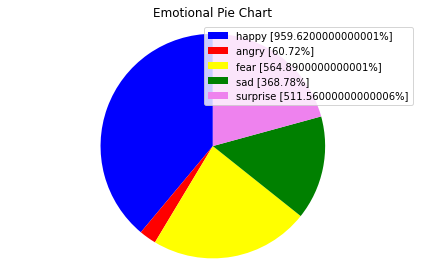

In [29]:
labels = ['happy ['+str(happy_score)+'%]', 'angry ['+str(angry_score)+'%]', 
'fear ['+str(fear_score)+'%]','sad ['+str(sad_score)+'%]','surprise ['+str(surprise_score)+'%]']

total=[happy_score,angry_score,fear_score,sad_score,surprise_score]

colors = ['blue','red','yellow','green','violet']
patches, texts = plt.pie(total, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Emotional Pie Chart")
plt.axis('equal')
plt.tight_layout()

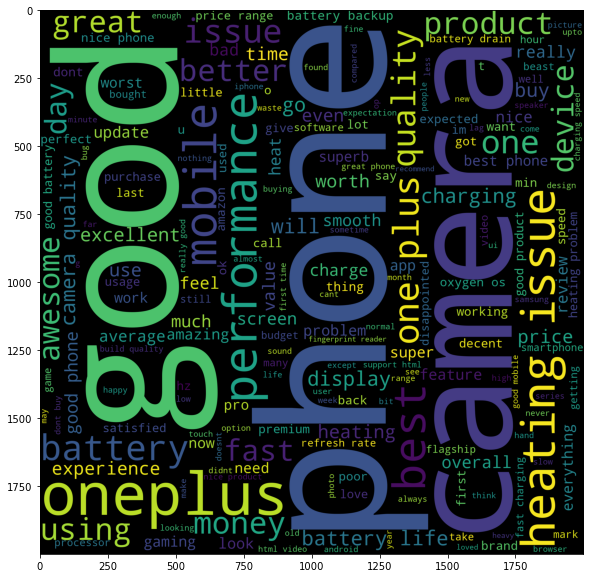

In [30]:
Review_wordcloud = ' '.join(data["clean1"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

## Conclusion:
### It is understood that most of the people have given a highly positive review for the Oneplus 9R and about half of them are sensing a fear about the product.

### Thus, it is easier to analyse the emotion behind any product review, by using NLP